This notebook contains visualisation , exploratory data analysis and a model to predict the likelihood of a customer defaulting a loan from credit card history of the customer 

-- The original dataset can be found in UCL machine learning reposiory--

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
# importing the library and dependencies 
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import warnings

In [ ]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [ ]:
# Reading the data to our worksapce 
#The data recides in the google drive directory
# mounting the drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# reading the training data and printing the first five rows
train= pd.read_csv('gdrive/My Drive/default_train.csv')
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [ ]:
# reading the test data 
test= pd.read_csv('gdrive/My Drive/default_test.csv')

#Explorative data analysis 

In [ ]:
# checking for null values
def missing_data(data):
    total = train.isnull().sum().sort_values(ascending = False)
    percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 


In [ ]:
null_values = missing_data(train)
print(null_values)

                            Total  Percent
ID                              0      0.0
BILL_AMT2                       0      0.0
PAY_AMT6                        0      0.0
PAY_AMT5                        0      0.0
PAY_AMT4                        0      0.0
PAY_AMT3                        0      0.0
PAY_AMT2                        0      0.0
PAY_AMT1                        0      0.0
BILL_AMT6                       0      0.0
BILL_AMT5                       0      0.0
BILL_AMT4                       0      0.0
BILL_AMT3                       0      0.0
BILL_AMT1                       0      0.0
LIMIT_BAL                       0      0.0
PAY_6                           0      0.0
PAY_5                           0      0.0
PAY_4                           0      0.0
PAY_3                           0      0.0
PAY_2                           0      0.0
PAY_0                           0      0.0
AGE                             0      0.0
MARRIAGE                        0      0.0
EDUCATION  

In [ ]:
# checking the data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
# Droping the ID column as we are sure it wont contribute to our analysis
train.drop('ID', axis = 1, inplace = True)

In [ ]:
# renaiming  the target columns
train.rename(columns = {'default_payment_next_month':'default'}, inplace = True)

In [ ]:
train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
train.describe ().T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0
PAY_5,21000.0,-0.260952,1.141454,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
print (train.shape)

(21000, 24)


In [ ]:
# checking number of duplicated roles 
duplicates = train.duplicated().sum()
print ('percentage of duplicated row is  {}'.format(duplicates /train.shape[0]))

percentage of duplicated row is  0.0007142857142857143


In [ ]:
# Since percentage of duplicated rows are not much, we can drop it 
train=train.drop_duplicates()

checking the values in the categorical variables if it conforms with the values in the data variable

In [ ]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']

for i in cat_cols:
    print(f'Column {i}:')
    print(train[i].value_counts())
    print('\n')

Column SEX:
2    12747
1     8238
Name: SEX, dtype: int64


Column EDUCATION:
2    9785
1    7405
3    3466
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64


Column MARRIAGE:
2    11176
1     9554
3      219
0       36
Name: MARRIAGE, dtype: int64


Column PAY_0:
 0    10324
-1     3937
 1     2597
-2     1919
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64


Column PAY_2:
 0    11043
-1     4174
 2     2776
-2     2628
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64


Column PAY_3:
 0    11056
-1     4125
-2     2853
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64


Column PAY_4:
 0    11542
-1     3949
-2     3032
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64


Column PAY_5:
 0    11852
-1     3840
-2    

WE can see that Education contains 5,6 and 0 which are not in the data variales . This will be converted to category 4 = others 

In [ ]:
train.loc[train['EDUCATION'].isin([5, 6, 0]), 'EDUCATION'] = 4

Marriage column contains category 0 . Assigning this to 3 which means others 

In [ ]:
train.loc[train['MARRIAGE']==0, 'MARRIAGE'] = 3

In [ ]:
train['MARRIAGE'].value_counts()

2    11176
1     9554
3      255
Name: MARRIAGE, dtype: int64

The columns PAY_0 - PAY_6 contain the categories -2 and 0. Assigning all such values to 0, which we will define to stand for 'Other':

In [ ]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_cols:
    train.loc[train[col] == -2, col] = 0

Let us check the data data types of the columns 

In [ ]:
train.dtypes 

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

All data category are treated as numeric but there are categrical variables like SEX , EDUCATION etc . The data type of categorical variables will be converted .

In [ ]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']

for col in cat_cols:
    train[col] = train[col].astype('category')


#Let us do some visualisation to have better  insight into the data 

In [ ]:
train.default.value_counts()

0    16343
1     4642
Name: default, dtype: int64

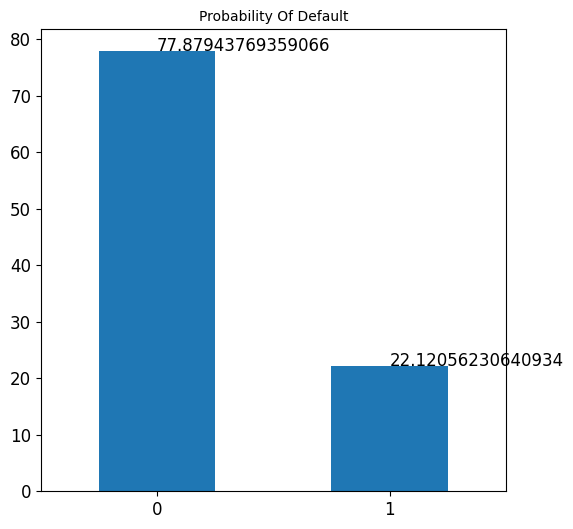

In [ ]:
default_count= (train['default'].value_counts(normalize=True)*100)
default_count.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Default", fontsize=10)
for x,y in zip([0,1],default_count):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [ ]:
# interactve pie chart of the default column 
px.pie(train, names = 'default')

In [ ]:
fig = px.histogram(train, x='default')
fig.update_layout(title_text='interactive histogram of the defaulters', title_x=0.5)

The data distribution shows that 77.7% of customers will not default thus we are faced with a biased dataset. This is expected because most credit card transactions are not expected to be bad . To treat this imbalance, we can resample,change our metrics or even our algorithm . This will be treated later

Let us see how age is related to default and bill amount 

In [ ]:
# Plotting the relatinship between Age and Bill_Amount 
fig =px.bar(train, x='AGE',y='BILL_AMT1',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL', title_x=0.5)

In [ ]:
fig =px.bar(train, x='AGE',y='BILL_AMT2',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL2', title_x=0.5)

In [ ]:
fig =px.bar(train, x='AGE',y='BILL_AMT3',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL3', title_x=0.5)

In [ ]:
fig =px.bar(train, x='AGE',y='BILL_AMT4',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL4', title_x=0.5)

In [ ]:
fig =px.bar(train, x='AGE',y='BILL_AMT5',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL5', title_x=0.5)

In [ ]:
fig =px.bar(train, x='AGE',y='BILL_AMT6',color='default',opacity=0.9,orientation='v',barmode='overlay',template='plotly_dark')
fig.update_layout(title_text='AGE VS BILL6', title_x=0.5)

we can see from the plots that defaulters spread across the ages . So we need to group the ages to have a better insight of the age group that are likely to default

Let us group customers defaulting into age group to hve an insight into age group that will likely default

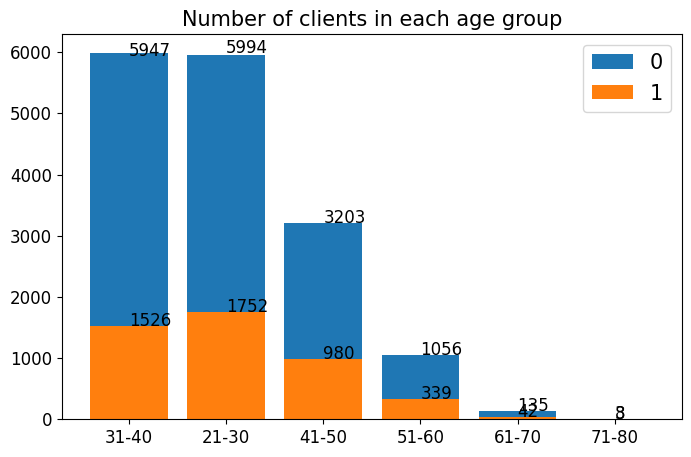

In [ ]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
train['AGE_BIN'] = pd.cut(x=train.AGE, bins=bins, labels=names, right=True)

age_count = train.AGE_BIN.value_counts()
age_0 = (train.AGE_BIN[train['default'] == 0].value_counts())
age_1 = (train.AGE_BIN[train['default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

The highest defaulters are in 21-30 age range while the lowest defaulters are in the age range 71-80. This shows that the possibility of customesr defaulting decreases with age . Age is a major factor in determining if a cutomer will default or not 

let us also visualise the relationship between the target column and some other columns 

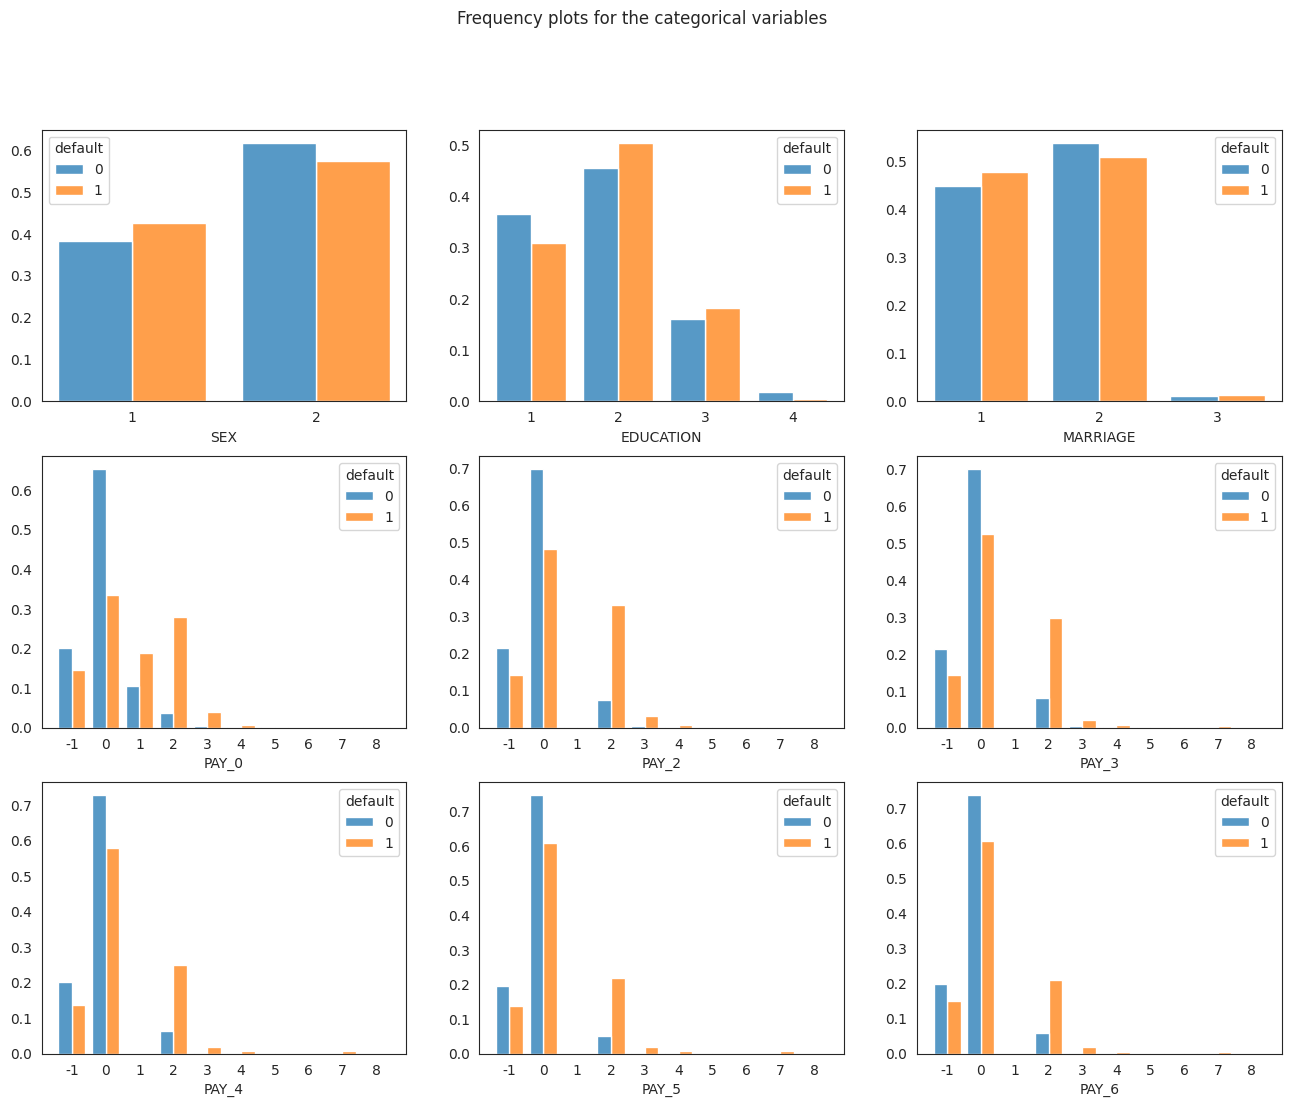

In [ ]:
sns.set_style('white')

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

sns.histplot(x = train['SEX'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,0])
axs[0,0].set_xticks([1,2], [1,2])

sns.histplot(x = train['EDUCATION'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,1])

sns.histplot(x = train['MARRIAGE'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,2])
axs[0,2].set_xticks([1,2,3], [1,2,3])

sns.histplot(x = train['PAY_0'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,0])
axs[1,0].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

sns.histplot(x = train['PAY_2'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,1])
axs[1,1].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

sns.histplot(x = train['PAY_3'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,2])
axs[1,2].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

sns.histplot(x = train['PAY_4'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[2,0])
axs[2,0].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

sns.histplot(x = train['PAY_5'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[2,1])
axs[2,1].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

sns.histplot(x = train['PAY_6'], hue=train['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[2,2])
axs[2,2].set_xticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8])

plt.suptitle('Frequency plots for the categorical variables')


for ax in axs.ravel():
    ax.set_ylabel('')

plt.show()

We can infer from the above that females have more tendecy to default compare to their male counterparts and among the education level, those with university degrees has more tendecy to default and those that pay duly in the previous month are less likely to defualt payment 

Let still drill the female defaulters further 

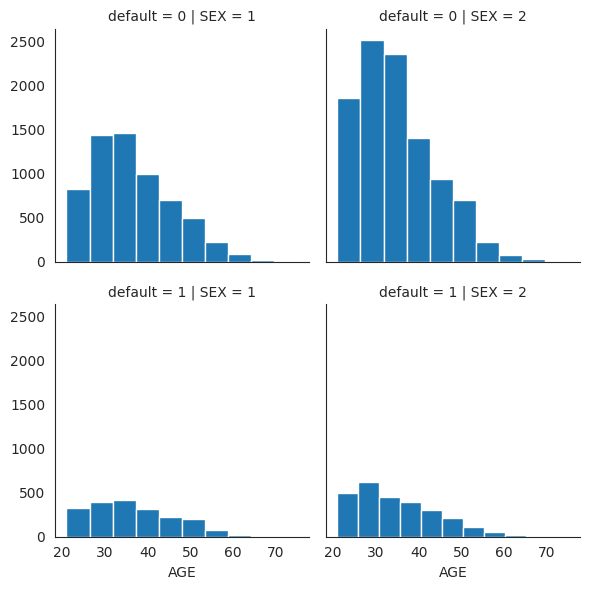

In [ ]:
fd= sns.FacetGrid(train, row='default', col='SEX')
fd= fd.map(plt.hist, 'AGE')


The above shows that among the female defaulters, the youths within the age of 20-30 have more tendecy to default

Now let us check the relationship between last month bill amount and default

<ipython-input-36-4355bbf631db>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



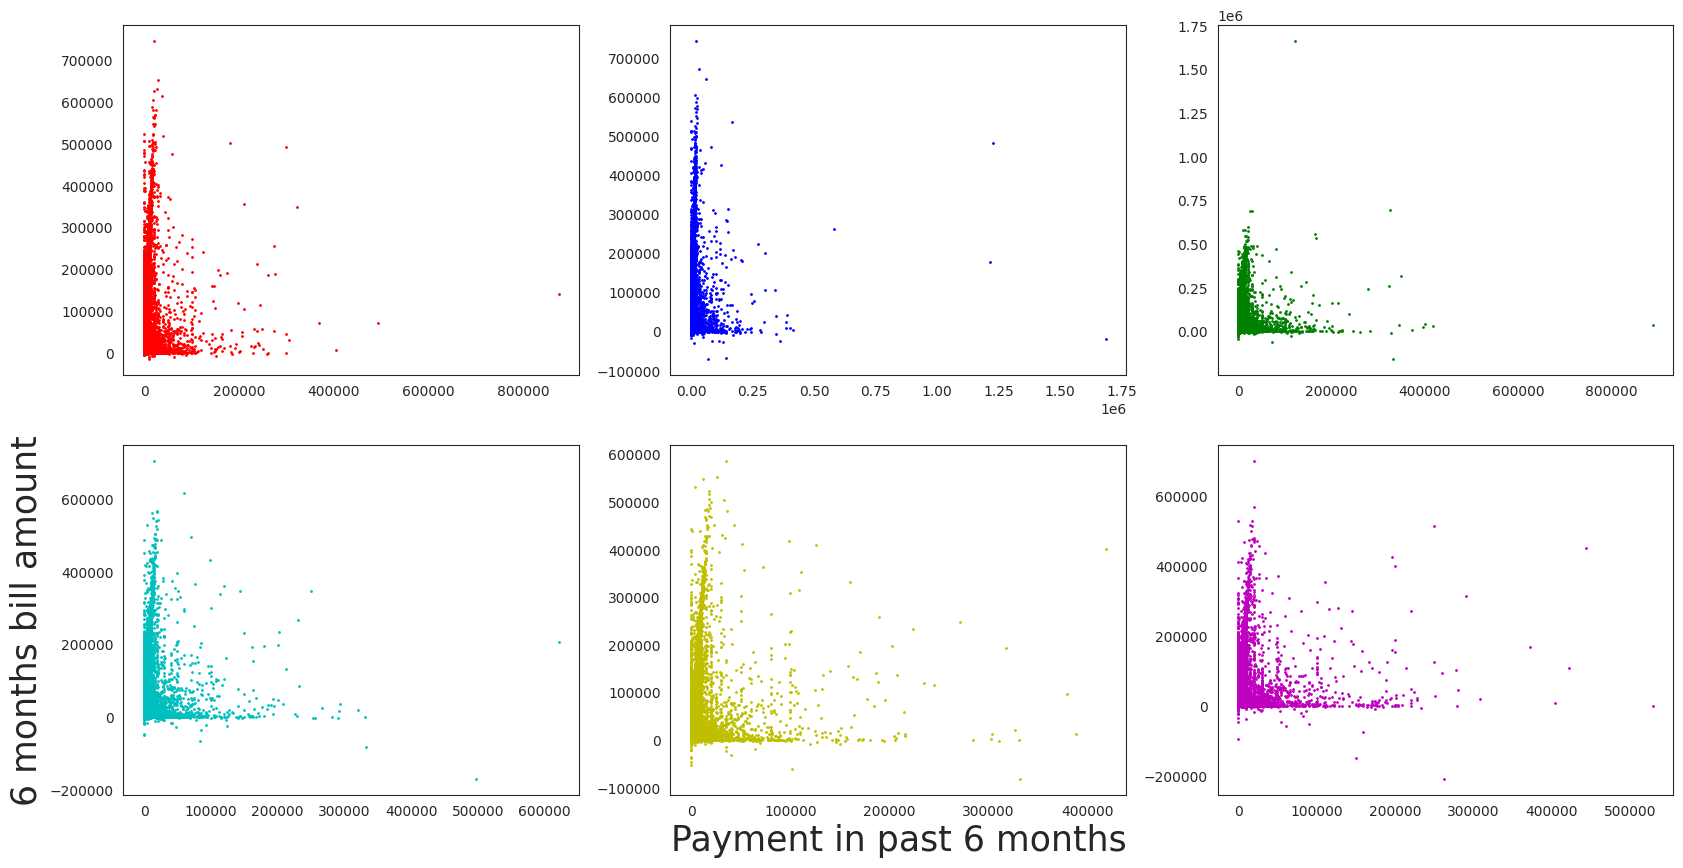

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=train.PAY_AMT1, y=train.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=train.PAY_AMT2, y=train.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=train.PAY_AMT3, y=train.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=train.PAY_AMT4, y=train.BILL_AMT4, c='c', s=1)
plt.ylabel("6 months bill amount", fontsize=25)

plt.subplot(235)
plt.scatter(x=train.PAY_AMT5, y=train.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=train.PAY_AMT6, y=train.BILL_AMT6, c='m', s=1)

plt.show()

we can infer from the scatter plot above  that there is higher proportion of clients for whom the bill amount is high but payment done is low . This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

#Dealing with Outliers

Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement or data entry error.Outliers can either be univariate which occurs when we look at a single variable or multivariate when we look at outlies in n dimensional space. There are different methods of dealing with outliers some of whcih are : Z-score method, IQR method,DBSCAN, isoaltion method etc.I will be using IQR method. In this method, Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers. The easiest way of detecting outlier is to first visualize it before performing the test above .

I first transofrm the numerical columns using cubic transfromation to reduce the size of the data . This has effect of reducing the number of data points that will fall into outlier region

In [ ]:
# ### Let's try a cubic root transformation of the numerical features to make it easier to visualise

cols = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in cols:
    name = col + "_cbrt"
    train[name] = np.cbrt(train[col])
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AGE_BIN,BILL_AMT1_cbrt,BILL_AMT2_cbrt,BILL_AMT3_cbrt,BILL_AMT4_cbrt,BILL_AMT5_cbrt,BILL_AMT6_cbrt,PAY_AMT1_cbrt,PAY_AMT2_cbrt,PAY_AMT3_cbrt,PAY_AMT4_cbrt,PAY_AMT5_cbrt,PAY_AMT6_cbrt
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,21-30,27.568205,23.263510,15.152518,15.088367,20.700200,12.641069,23.263510,15.152518,15.104456,20.700200,12.641069,30.015917
1,240000,2,1,2,46,2,2,0,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,41-50,7.697002,0.000000,0.000000,13.084265,11.890202,13.136626,0.000000,0.000000,13.084265,0.000000,13.136626,14.540119
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,41-50,36.802453,37.753483,33.829888,32.837586,32.721874,33.000612,17.099759,12.599210,12.599210,14.422496,14.422496,11.447142
3,50000,2,2,2,24,-1,-1,0,0,0,0,2675,0,0,0,0,0,0,0,0,0,0,0,1,21-30,13.881655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,51-60,32.976721,26.457866,26.863047,27.395638,27.703070,27.787939,11.447142,11.447142,11.447142,10.092476,9.568298,11.315909


Boxplot is now plotted to visualize the outliers in each numerical columns 



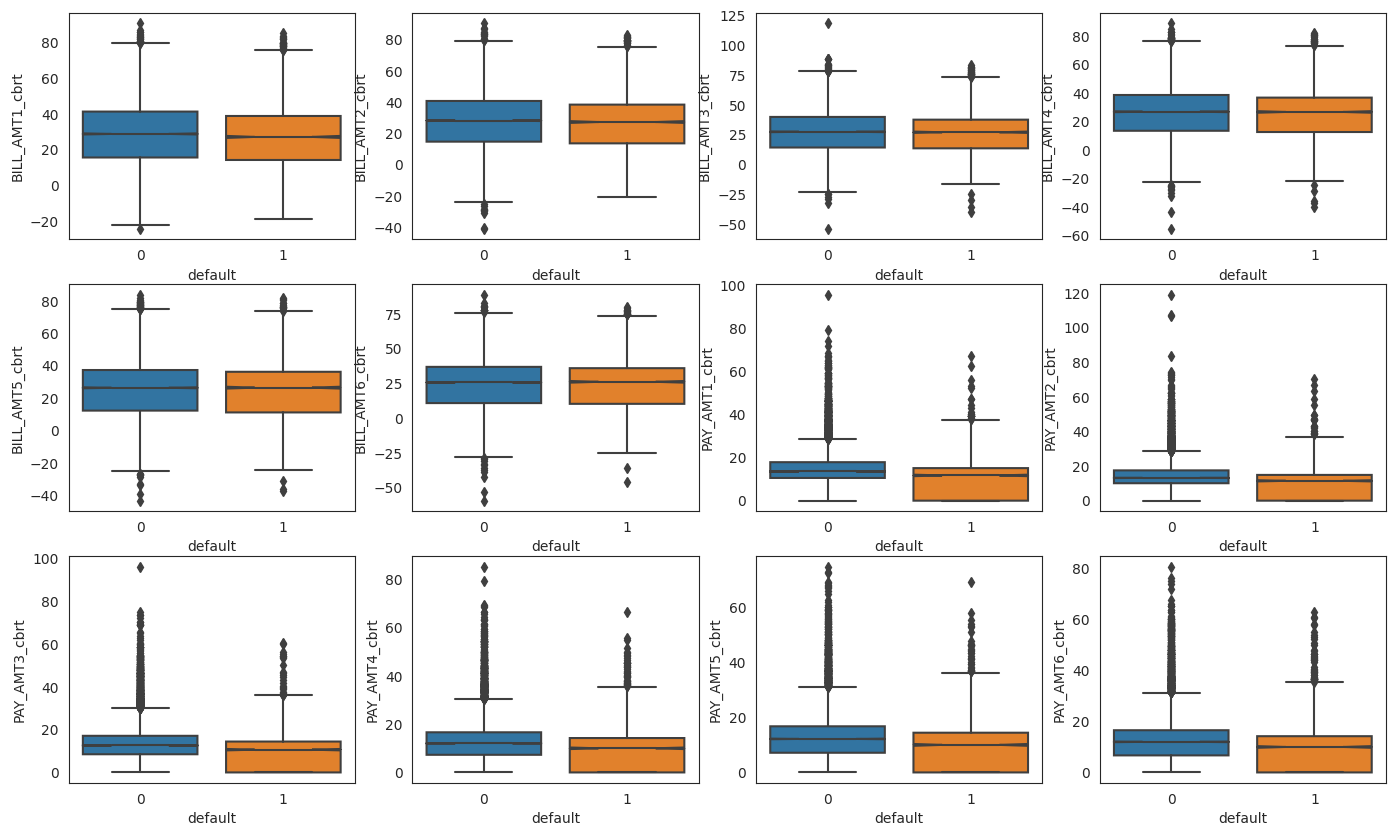

In [ ]:
 # Plotting a boxplots of the transfomed numerical features
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (17, 10))
sns.boxplot(x = "default", y = "BILL_AMT1_cbrt", data =train , ax = ax[0, 0], notch = True)
sns.boxplot(x = "default", y = "BILL_AMT2_cbrt", data = train, ax = ax[0, 1], notch = True)
sns.boxplot(x = "default", y = "BILL_AMT3_cbrt", data = train, ax = ax[0, 2], notch = True)
sns.boxplot(x = "default", y = "BILL_AMT4_cbrt", data = train, ax = ax[0, 3], notch = True)
sns.boxplot(x = "default", y = "BILL_AMT5_cbrt", data = train, ax = ax[1, 0], notch = True)
sns.boxplot(x = "default", y = "BILL_AMT6_cbrt", data = train, ax = ax[1, 1], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT1_cbrt", data = train, ax = ax[1, 2], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT2_cbrt", data = train, ax = ax[1, 3], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT3_cbrt", data = train, ax = ax[2, 0], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT4_cbrt", data = train, ax = ax[2, 1], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT5_cbrt", data = train, ax = ax[2, 2], notch = True)
sns.boxplot(x = "default", y = "PAY_AMT6_cbrt", data = train, ax = ax[2, 3], notch = True)
plt.show()



we can now see thta almost all the columns have sizeable number of outliers. Let us determine the number of outliers in two of the columns for example in PAY_AMT1 and PAY_AMT2

In [ ]:
# finding the number of outliers in PAY_AMT1
# Find Q1, Q3, IQR and cut off value 
q25, q75 = np.quantile(train["PAY_AMT1"], 0.25), np.quantile(train["PAY_AMT1"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

# Define lower and upper boundaries
lower, upper = q25 - cutoff, q75 + cutoff

# Define new dataset by masking upper and lower boundaries
new_train = train[(train["PAY_AMT1"] > lower) & (train["PAY_AMT1"] < upper)]
print('shape of original dataset {}'.format(train.shape))
print('shape of trimmed dataset {}'.format(new_train.shape))
print('trimmed dataset : {}'.format(train.shape[0]-new_train.shape[0]))

shape of original dataset (20985, 37)
shape of trimmed dataset (19080, 37)
trimmed dataset : 1905


In [ ]:
# finding the number of outliers in PAY_AMT2
# Find Q1, Q3, IQR and cut off value 
q25, q75 = np.quantile(train["PAY_AMT2"], 0.25), np.quantile(train["PAY_AMT2"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

# Define lower and upper boundaries
lower, upper = q25 - cutoff, q75 + cutoff

# Define new dataset by masking upper and lower boundaries
new_train1 = train[(train["PAY_AMT2"] > lower) & (train["PAY_AMT2"] < upper)]
print('shape of original dataset {}'.format(train.shape))
print('shape of trimmed dataset {}'.format(new_train1.shape))
print('trimmed dataset : {}'.format(train.shape[0]-new_train1.shape[0]))

shape of original dataset (20985, 37)
shape of trimmed dataset (19077, 37)
trimmed dataset : 1908


WE can see that only 2 out of the 12 numerical columns contains 3813 outliers (18% of the dataset). This is huge as a result,we can not consider this as a data entry mistake. Apart from deleting the observation (We should be the last resort ) other ways of dealing with outliers are trasnforming(Which we have done above), imputation and using a robust algorithm that can handle outliers .

###In this situation, since the number of outliers are much, we will use algorithm that can handle outliers instead of dropping them 

Let us examine the correlation between the features

<ipython-input-41-c825dd1a5c0e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



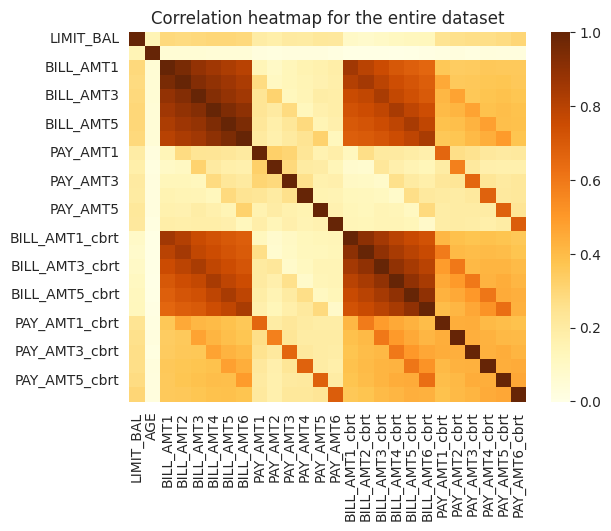

In [ ]:
sns.heatmap(train.corr(), cmap='YlOrBr')
plt.title('Correlation heatmap for the entire dataset')
plt.show()

The variables PAY_0 - PAY_6 and BILL_AMT_1 - BILL_AMT_6 are highly correlated with each other. We can look at the values of the correlation coefficients between these variables further 

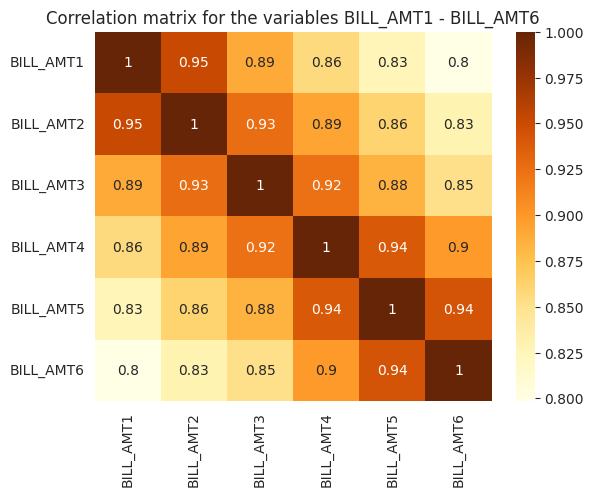

In [ ]:
sns.heatmap(train.loc[:, 'BILL_AMT1':'BILL_AMT6'].corr(), annot=True, cmap='YlOrBr')
plt.title('Correlation matrix for the variables BILL_AMT1 - BILL_AMT6')
plt.show()

Investigating further , we see that the variables BILL_AMT1 - BILL_AMT6 are highly positively correlated (all correlation coefficients > 0.8). This shows that any of these variables contains most of the information present in the others and are multicolliner points so we can aggragate them into one 

In [ ]:
train['BILL_AMT_AVG'] = train.loc[:, 'BILL_AMT1':'BILL_AMT6'].mean(axis=1)
train.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)

In [ ]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AGE_BIN,BILL_AMT1_cbrt,BILL_AMT2_cbrt,BILL_AMT3_cbrt,BILL_AMT4_cbrt,BILL_AMT5_cbrt,BILL_AMT6_cbrt,PAY_AMT1_cbrt,PAY_AMT2_cbrt,PAY_AMT3_cbrt,PAY_AMT4_cbrt,PAY_AMT5_cbrt,PAY_AMT6_cbrt,BILL_AMT_AVG
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,12590,3479,3446,8870,2020,27043,0,21-30,27.568205,23.263510,15.152518,15.088367,20.700200,12.641069,23.263510,15.152518,15.104456,20.700200,12.641069,30.015917,8557.666667
1,240000,2,1,2,46,2,2,0,-1,0,-1,0,0,2240,0,2267,3074,0,41-50,7.697002,0.000000,0.000000,13.084265,11.890202,13.136626,0.000000,0.000000,13.084265,0.000000,13.136626,14.540119,1107.333333
2,320000,2,2,1,41,0,0,0,0,0,0,5000,2000,2000,3000,3000,1500,0,41-50,36.802453,37.753483,33.829888,32.837586,32.721874,33.000612,17.099759,12.599210,12.599210,14.422496,14.422496,11.447142,41459.666667
3,50000,2,2,2,24,-1,-1,0,0,0,0,0,0,0,0,0,0,1,21-30,13.881655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,445.833333
4,80000,1,3,1,52,-1,0,0,0,0,0,1500,1500,1500,1028,876,1449,0,51-60,32.976721,26.457866,26.863047,27.395638,27.703070,27.787939,11.447142,11.447142,11.447142,10.092476,9.568298,11.315909,22841.000000


To have estimate the  distribution of the numeric varibales,i will draw the KDE plot which is the probability density function

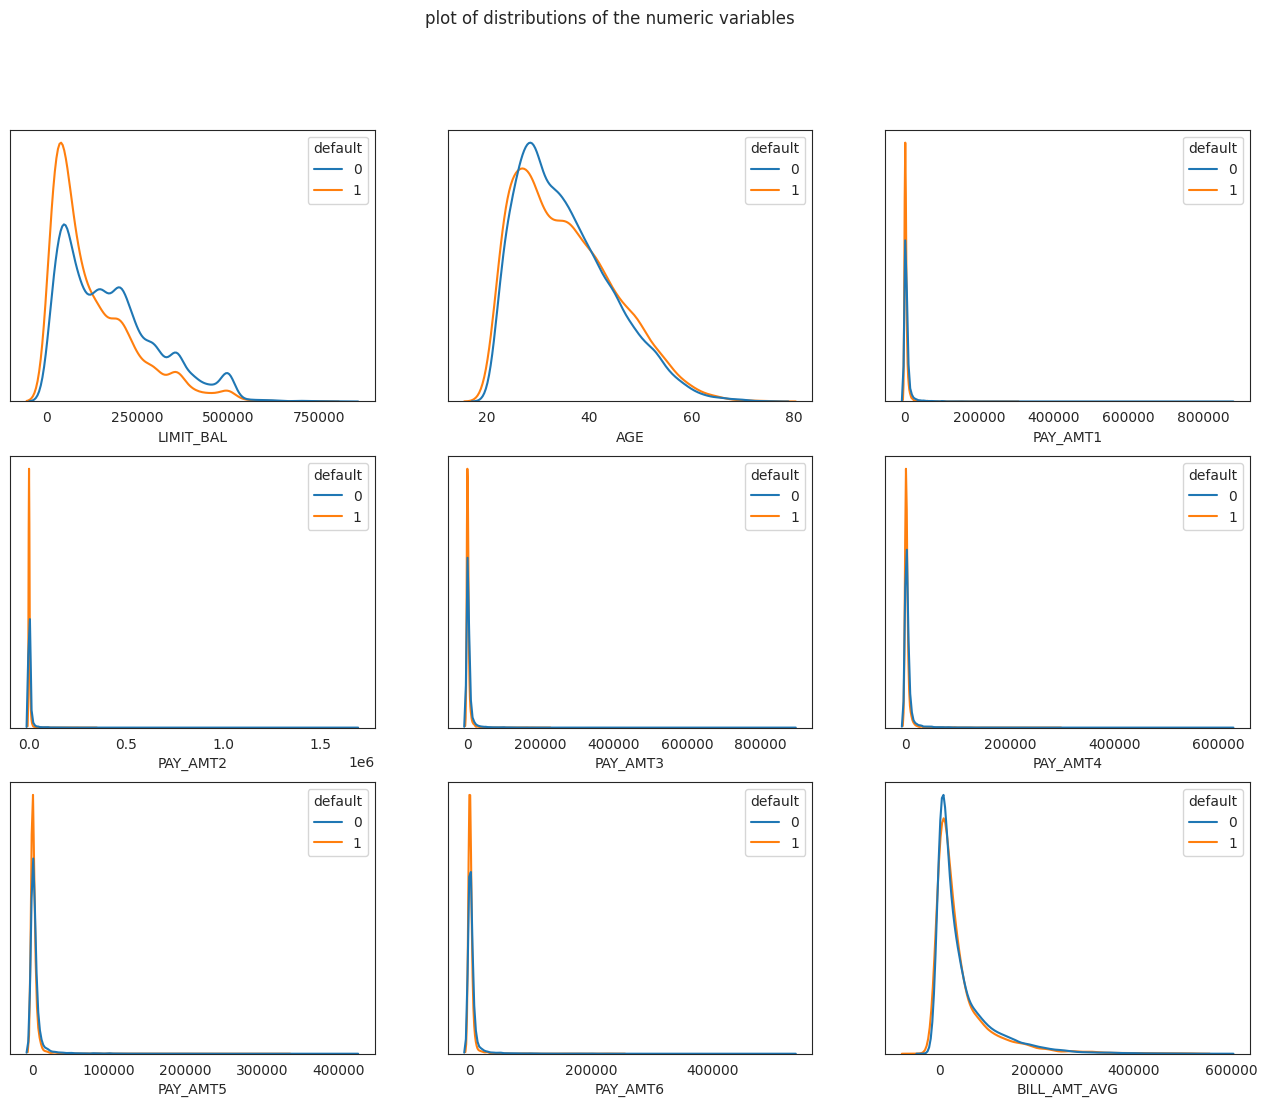

In [ ]:
sns.set_style('white')

num_cols = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT_AVG']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
for col, ax in zip(num_cols, axs.ravel()):
    sns.kdeplot(data=train, hue='default', x=col, ax=ax, common_norm=False)
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.locator_params(axis='x', nbins=5)
    ax.set_ylabel('')

fig.suptitle('plot of distributions of the numeric variables')

plt.show()


It can be observed  that the distribution of LIMIT_BAL and BILL_AMT_AVG for clients that defaulted and that did not default is quite similar, while those that defaulted were on  slightly younger in age. The distributions for the other variables (PAY_AMT1 - PAY_AMT6) aren't as informative due to the distributions being extremely positively skewed.

The dataset will now be seperated  into numeric features, categorical features and targets, one-hot encode all categorical features to get dummy variables, and standardize all numeric features to have zero mean and unit standard deviation and combine the two fetures 

In [ ]:
num_cols = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT_AVG']
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X_num = train[num_cols]
X_cat = train[cat_cols]
y = train['default']

# Getting dummy variables:
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True).reset_index(drop=True)

# Scaling numeric features:
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)
# Combining the two feature datasets:
X = pd.concat([X_cat_dummies, X_num_scaled], ignore_index=True, axis=1)
X.columns = list(X_cat_dummies.columns) + list(X_num_scaled.columns)


#Model building and Evaluation

In [ ]:
# Splitting the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
X_train.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,LIMIT_BAL,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_AVG
17931,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.908743,-0.484755,-0.337249,-0.193722,-0.177823,-0.310017,-0.266419,-0.261490,-0.436114
18326,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.908743,-0.701974,-0.218717,-0.160733,-0.188463,-0.180752,-0.248808,-0.238106,-0.264380
12670,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.719539,-0.267536,-0.289659,-0.247826,-0.306031,-0.286814,-0.281935,-0.294590,-0.709903
19385,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.676131,-0.919193,-0.140485,-0.130754,0.070185,-0.124521,-0.314276,-0.116665,0.501103
12846,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.443520,-0.810583,-0.005358,-0.022044,-0.070896,-0.310017,-0.052404,-0.085599,1.047675


# Baseline Model: Logistc regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

params = {'penalty': ['l1', 'l2'],
            'C': np.linspace(0.01, 2, 20)}
# GridsearchCV to search for the best hyperparameters
model_1 = GridSearchCV(logreg, params, scoring='f1', cv=5, verbose=1, n_jobs=-1)
model_1.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [ ]:
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score of Linear regression model :', accuracy)

Accuracy score of Linear regression model : 0.8219935201067277


A Note on Model Evaluation: The model will be evaluated based on evaluation metrics that can handle imbalace data.Since our data is biased, We will use a more robust evalauition metrics 

In [ ]:
# creating a confusion matrix and  Calculating classification report 
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4606
           1       0.37      0.68      0.48       641

    accuracy                           0.82      5247
   macro avg       0.66      0.76      0.69      5247
weighted avg       0.88      0.82      0.84      5247

[[3879  727]
 [ 207  434]]


#model_2 : Decision_tree
A decision tree is a classification/regression method that works by recursively splitting the feature space into two parts until some stopping criterion, such as the depth of the tree, is met . This produces a tree-like representation of the feature space

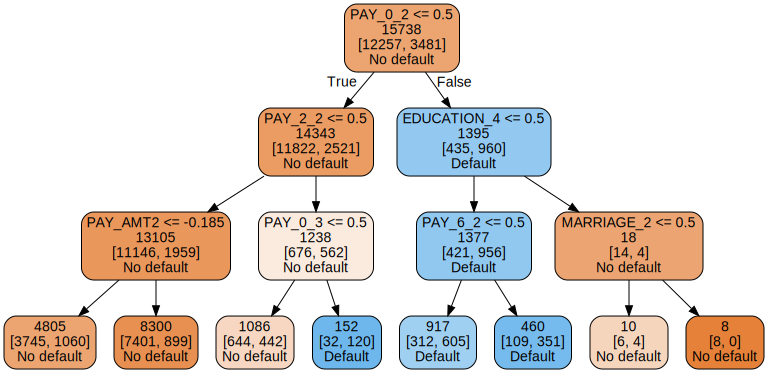

In [ ]:
# Training and visualing a single decision tree with a maximum depth of 5:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plot_data = export_graphviz(tree, feature_names=X.columns, class_names=['No default', 'Default'], label=None, impurity=False, rounded=True, filled=True)
graph = graphviz.Source(plot_data, format="svg")
graph

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score of Decision Tree  model :', accuracy)

Accuracy score of Decision Tree  model : 0.8176100628930818


In [ ]:
# creating a confusion matrix and  Calculating classification report 
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4715
           1       0.32      0.69      0.43       532

    accuracy                           0.82      5247
   macro avg       0.64      0.76      0.66      5247
weighted avg       0.89      0.82      0.84      5247

[[3922  793]
 [ 164  368]]


# Model 3: 
This an ensemble techniques in which several decsion trees are arranged in parrallel. Random forest model works by generating  n bootstrap samples from the original dataset with a random subset of features taken in each bootstrap sample. Bootstrap samples are formed by randomly selecting  m observations from the original dataset with replacement, where  m is the number of observations in the original training set. Finally, the majority voting of the  decision trees  predictions is taken as the final prediction made by the random forest mod

In [ ]:
random_f= RandomForestClassifier(random_state=42, n_estimators=1000)
params = {'min_samples_split': [50, 100, 150],
            'max_features': ['sqrt', 0.25]}
random_f_cv = GridSearchCV(random_f, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
random_f_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [50, 100, 150]},
             scoring='f1', verbose=1)

In [ ]:
y_pred = random_f_cv.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score of Random forest :', accuracy)

Accuracy score of Random forest : 0.8204688393367638


In [ ]:
# creating a confusion matrix and  Calculating classification report 
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4570
           1       0.39      0.66      0.49       677

    accuracy                           0.82      5247
   macro avg       0.66      0.75      0.69      5247
weighted avg       0.87      0.82      0.84      5247

[[3857  713]
 [ 229  448]]


#Random forest is chosen as the model to be deployed since it has the highest f1 score the metrics being routed for and we also know that random forest can handle outliers bettter than other models.

#saving the model in pickle file 


In [ ]:
import pickle
pickle.dump(random_f_cv,open('model1.pkl','wb'))
